#  Smoothing a large data set 
Programa para suavizar un set de datos utilizando Rolling Mean

Siguiendo tutorial de:
https://www.youtube.com/watch?v=OwnaUVt6VVE

### Import libraries

In [61]:
# Libraries
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import pandas as pd
import math
import os #look for directory
%matplotlib inline

### Import data

In [62]:
# Read tables
def importarDatabase(name,index):
    #name='Database.csv'
    #inex=Name of the coloumn for index
    data = pd.read_csv(name)
    data.head()
    data=data.set_index(index,drop='False') #drop False, so if index is changed later, it is not lost
    data
    return data



# Import database
data=importarDatabase("Database/Maintenance of Turbofan Engine.csv",'Maquina')
data=data.loc[1,:] #Extraer datos sólo de la máquina 1
data
#Sensores Importantes basados en la visualización y tiempo (Ver archivo Predictive Maintenance)
sensorsName=('Tiempo','LPCOutletTemp','HPCOutletTemp','LPT','TotalHP','PhysFanSpeed','PhysCoreSpeed','Sensor 14','Sensor 15','Sensor 16','Sensor 17','Sensor 18')

#Seleccionar columna (i.e., sensor data to smooth)
s=2 # * Modificable *
data=data.loc[:,['Tiempo',sensorsName[s]]]

data

,Tiempo,HPCOutletTemp
Maquina,,
1,1,1585.29
1,2,1588.45
1,3,1586.94
1,4,1584.12
1,5,1587.19
1,6,1579.12
1,7,1583.34
1,8,1580.89
1,9,1593.29


### Plot signal

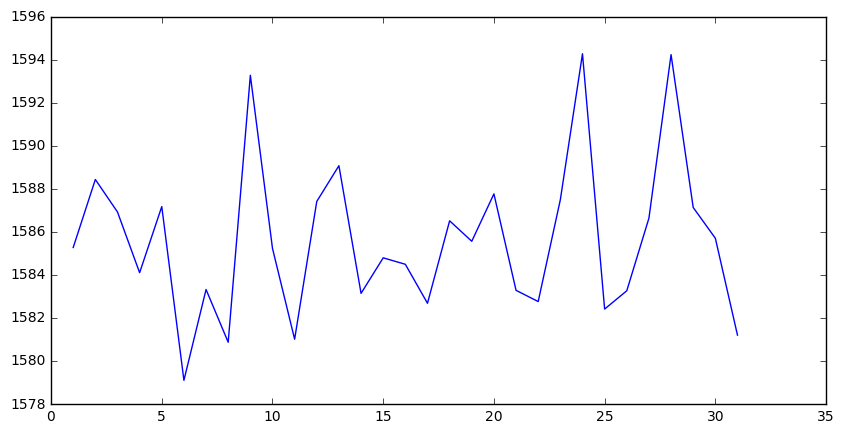

In [63]:
#Crear plot
fig, ax = plt.subplots(1,1,figsize=(10,5))


ax.plot('Tiempo',sensorsName[s],data=data) #plot data original
#ax[1].plot('Tiempo',)

### A way of smoothing: Sample data

In [64]:
#Select porcentage to sample (.1 = 10% of the data)
sampling= 0.5 # * Modificable *

# 1 Take samples
data2Smooth=data.loc[1,:]
one_tenth= data2Smooth.sample(frac= sampling,random_state=np.random.randint(10))

#2 Removing index name 
one_tenth.index.name = None
one_tenth=one_tenth.sort_values(by=['Tiempo'],ascending=[True]) #organizing samples by time
one_tenth.head()


,Tiempo,HPCOutletTemp
1,1,1585.29
1,3,1586.94
1,5,1587.19
1,6,1579.12
1,7,1583.34


### Plot sampled vs original data

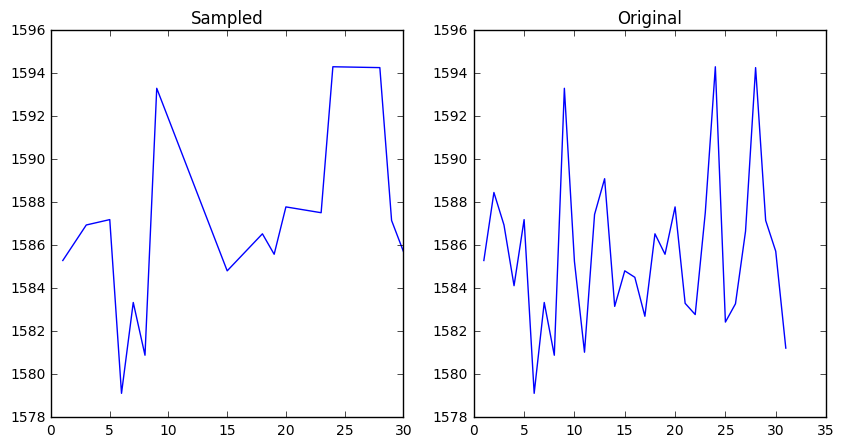

In [150]:

fig, ax= plt.subplots(1,2,figsize=(10,5))
ax[0].plot('Tiempo',sensorsName[s],data=one_tenth)
ax[1].plot('Tiempo',sensorsName[s],data=data)

ax[0].set_title('Sampled')
ax[1].set_title('Original')

### Reset index from Machine to Time

In [72]:
data1 = data.reset_index() #make index 
data1.head(5) #Show the first n rows

,Maquina,Tiempo,HPCOutletTemp
0,1,1,1585.29
1,1,2,1588.45
2,1,3,1586.94
3,1,4,1584.12
4,1,5,1587.19


###  Rolling Mean

In [86]:
#Rolling mean

data1['Rolling_Mean'] = data1[sensorsName[s]].rolling(window=2).mean() #The bigger the dataset, the bigger the window can be (to some extend)
data1.head(6) #show the first n, depending on the window=w, the first w won't have stimate rolled value


,Maquina,Tiempo,HPCOutletTemp,Rolling_Mean
0,1,1,1585.29,NaN
1,1,2,1588.45,1586.870
2,1,3,1586.94,1587.695
3,1,4,1584.12,1585.530
4,1,5,1587.19,1585.655
5,1,6,1579.12,1583.155


###  Plotting original vs Sampled vs Rolling Mean Plot 

HPCOutletTemp


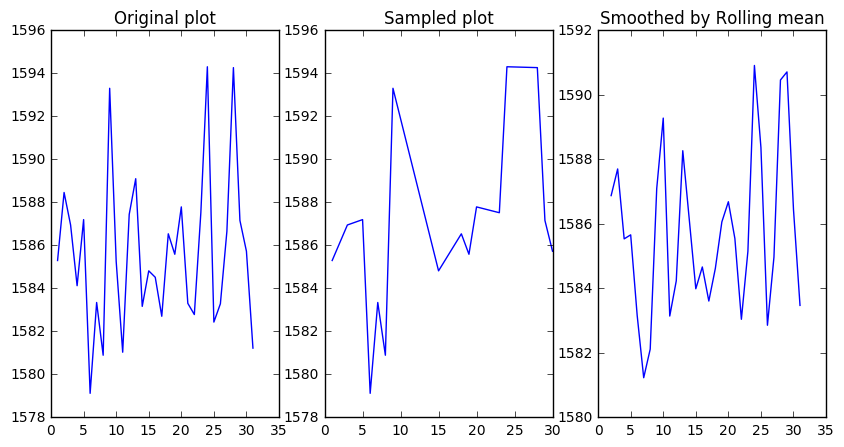

In [151]:
#Plot
print(sensorsName[s])
fig, ax= plt.subplots(1,3,figsize=(10,5))
ax[0].plot('Tiempo',sensorsName[s],data=data)
ax[0].set_title('Original plot')
ax[1].plot('Tiempo',sensorsName[s],data=one_tenth)
ax[1].set_title('Sampled plot')
ax[2].plot('Tiempo','Rolling_Mean',data=data1)
ax[2].set_title('Smoothed by Rolling mean')

### Plotting the Original vs Smoothed

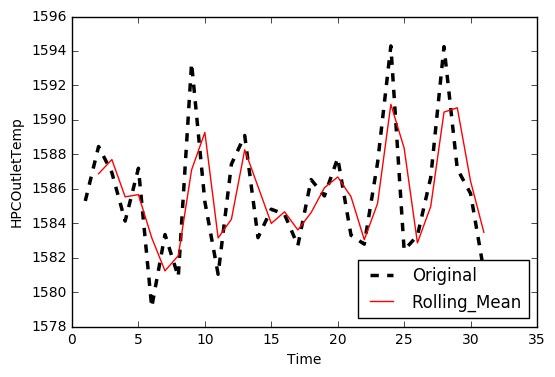

In [118]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot('Tiempo',sensorsName[s],data=data, color=(0,0,0),linewidth= 2.5,label='Original',linestyle='dashed')
ax.plot('Tiempo','Rolling_Mean',data=data1, color='r')



ax.set_xlabel('Time')
ax.set_ylabel(sensorsName[s])

ax.legend(loc='lower right')

# Another, simple way, for smoothing

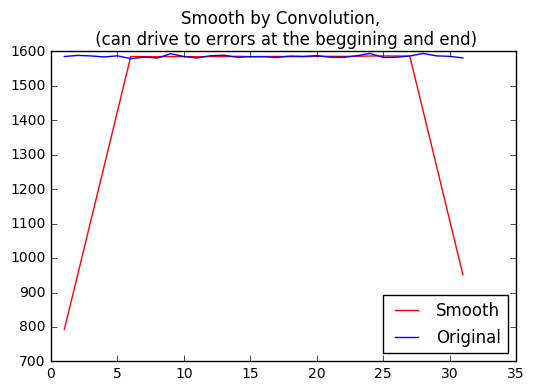

In [149]:
#This method can drive to ERRORS if there is not enough data poitns for the convolution

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth


fig, ax = plt.subplots()
x=data.loc[:,'Tiempo']
y=data.loc[:,sensorsName[s]]

#Plot
ax.plot(x,smooth(y,10),color='r',label='Smooth') #smooth
ax.plot(x,y,label='Original') #original
ax.set_title('Smooth by Convolution, \n (can drive to errors at the beggining and end)')
ax.legend(loc='lower right')

# Playing with getting just some data from the Whole Database

In [133]:
#Igual a

data[(data['Tiempo']==1)]

,Tiempo,HPCOutletTemp
Maquina,,
1,1,1585.29


In [134]:
#Mayor a

data[(data['Tiempo']>=10)]

,Tiempo,HPCOutletTemp
Maquina,,
1,10,1585.25
1,11,1581.03
1,12,1587.43
1,13,1589.09
1,14,1583.16
1,15,1584.81
1,16,1584.51
1,17,1582.70
1,18,1586.53


In [152]:
#Entre

data[(data['Tiempo']>=5) & (data['Tiempo']<=10)]

,Tiempo,HPCOutletTemp
Maquina,,
1,5,1587.19
1,6,1579.12
1,7,1583.34
1,8,1580.89
1,9,1593.29
1,10,1585.25


In [155]:
#Columna
data['Tiempo']

#Columnas
data['Tiempo','HPCOutletTemp']

#Index
data.index

#https://pythonhow.com/accessing-dataframe-columns-rows-and-cells/

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1],
           dtype='int64', name='Maquina')

In [ ]:
#Following topic: Linear regression
from sklearn.linear_model import LinearRegression